In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from sklearn.model_selection import train_test_split
from keras.models import Sequential

Importing dataset

In [1]:
from tensorflow.keras.datasets import mnist

In [28]:
(train_X,train_y),(test_X,test_y)=mnist.load_data()

In [29]:
print(np.unique(train_y))

[0 1 2 3 4 5 6 7 8 9]


In [30]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_y)
y_test=to_categorical(test_y)

In [31]:
train_X=train_X.reshape(60000,784)
test_X=test_X.reshape(10000,784)
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X/=255.0
test_X/=255.0

In [33]:
model=keras.models.Sequential([
                         keras.layers.Dense(512,activation='relu',input_shape=(784,)),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(256,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(64,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(10,activation='softmax')
])
print(model.summary())
model_history=trainModel(model=model,epochs=20,optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [32]:
def trainModel(model,epochs,optimizer):
  batch_size=128
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics='accuracy')
  return model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=epochs,batch_size=batch_size)

In [34]:
test_loss,test_acc=model.evaluate(test_X,test_y,batch_size=128)

79/79 [==============================] - 0s 6ms/step - loss: 0.0811 - accuracy: 0.9822


In [35]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


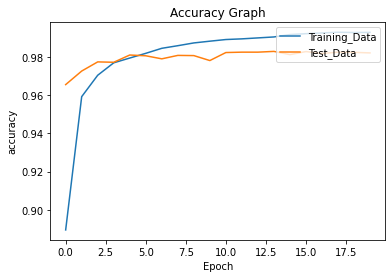

In [36]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Training_Data','Test_Data'],loc='upper right')
plt.show()

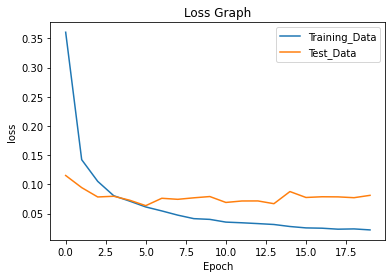

In [37]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Training_Data','Test_Data'],loc='upper right')
plt.show()

In [39]:
model=keras.models.Sequential([
                         keras.layers.Dense(1024,activation='relu',input_shape=(784,)),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(512,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(256,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(64,activation='relu'),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(10,activation='softmax')
])
print(model.summary())
model_history=trainModel(model=model,epochs=20,optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 128)              

In [40]:
test_loss,test_acc=model.evaluate(test_X,test_y,batch_size=128)

79/79 [==============================] - 1s 11ms/step - loss: 0.1005 - accuracy: 0.9802


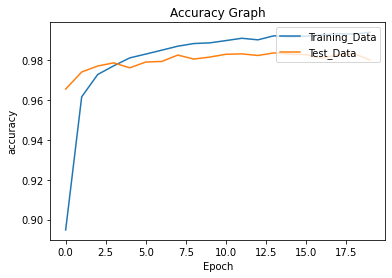

In [41]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Training_Data','Test_Data'],loc='upper right')
plt.show()

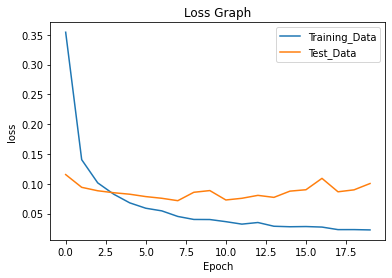

In [42]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Training_Data','Test_Data'],loc='upper right')
plt.show()